In [37]:
import pandas as pd
import numpy as np

import string
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('./../P6_P7_spam.csv',encoding='latin-1')

In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
df=df[['v2','v1']]

In [22]:
df.rename(columns={'v2':'message','v1':'label'},inplace=True)

In [23]:
def processing_text(message):
    l=[i for i in message if i not in string.punctuation]
    s=''.join(l)
    return [w for w in s.split() if s.lower() not in stopwords.words('english')]

In [24]:
processing_text("hello fjhdkjf")

['hello', 'fjhdkjf']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(df['message'],df['label'],test_size=0.2,random_state=0)

In [27]:
a = CountVectorizer(analyzer=processing_text).fit(X_train)
b= a.transform(X_train)

c=TfidfTransformer(use_idf=False)
mess1 = c.transform(b)

In [28]:
mnb=MultinomialNB()

In [29]:
mnb.fit(mess1,y_train)

MultinomialNB()

In [30]:
e=a.transform(X_test)
mess2=c.transform(e)

In [31]:
y_pred=mnb.predict(mess2)

In [35]:
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.9192825112107623


Confusion matrix: 


<AxesSubplot:>

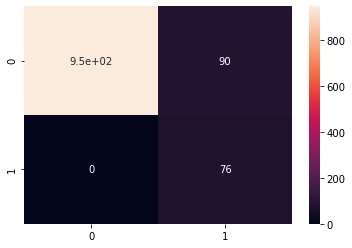

In [39]:
print("Confusion matrix: ")
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

In [40]:
print("Classification Report: ")
print(classification_report(y_pred,y_test))

Classification Report: 
              precision    recall  f1-score   support

         ham       1.00      0.91      0.95      1039
        spam       0.46      1.00      0.63        76

    accuracy                           0.92      1115
   macro avg       0.73      0.96      0.79      1115
weighted avg       0.96      0.92      0.93      1115



In [44]:
mnb.predict(c.transform(a.transform(["Hello what is up with u"])))

array(['ham'], dtype='<U4')

## Diabetes-Naive Bayes

In [111]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [112]:
df1=pd.read_csv('diabetes_data_upload.csv')

In [113]:
df1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [114]:
df1.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [115]:
df1.drop(['Age'],axis=1,inplace=True)

In [116]:
for i in df1.columns:
    df1[i]=le.fit_transform(df1[i])
    d=dict(zip(le.classes_,le.transform(le.classes_)))
    print(d)

{'Female': 0, 'Male': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'Negative': 0, 'Positive': 1}


In [117]:
X=df1[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']]
y=df1['class']

In [118]:
X

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [119]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [120]:
mnb1=MultinomialNB()

In [121]:
mnb1.fit(X1_train,y1_train)

MultinomialNB()

In [122]:
y1_pred=mnb1.predict(X1_test)

In [123]:
accuracy_score(y1_pred,y1_test)

0.9038461538461539

<AxesSubplot:>

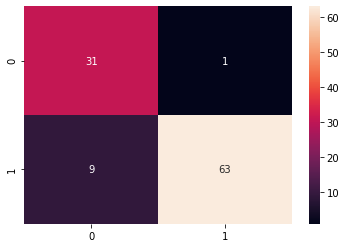

In [124]:
sns.heatmap(confusion_matrix(y1_pred,y1_test),annot=True)

In [125]:
print(classification_report(y1_pred,y1_test))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86        32
           1       0.98      0.88      0.93        72

    accuracy                           0.90       104
   macro avg       0.88      0.92      0.89       104
weighted avg       0.92      0.90      0.91       104

